# Exploratory Data Analysis (Mandatory Task)
Segment the dataset and draw unique insights, including visualisation of the transaction volume and assessing the effect of any outliers.

## Background information of task:

You have a transaction dataset of 100 hypothetical customers of ANZ about their purchases, recurring transactions and salary transactions.

### Task breakdown:

1.	Load dataset into analysis tool
2.	Check for data issues. Is data needs to be cleaned?
3.	Insights about data 

    •	What is the average transaction amount

    •	How many transaction do customers make each month, on average

    •	Segment dataset by transaction date and time

    •	Visualize transaction volume and spending over the course of an average day or week. Consider effect of any outliers that distort your analysis

    •	What insights you can draw from the location information provided in the dataset
    
4.	Put together 2-3 slides summarizing your most interesting findings to ANZ management.


#### Step1: Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Step2: Load dataset

Here, we will deal with ANZ synthesised transaction dataset of 100 hypothetical customers about their purchases, recurring transactions and salary transactions

In [2]:
# Load dataset
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
# Check shape of dataset
rows, columns = df.shape
print(f'There are {rows} rows and {columns} columns')

There are 12043 rows and 23 columns


In [4]:
#Check column names
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [5]:
#check info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [6]:
# Check number of missing values in our dataset
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [7]:
df.sample(3)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
3164,authorized,1.0,NaN,ACC-2173390920,AUD,144.71 -37.58,SALES-POS,cd4dc247-4769-4eb9-a414-6ca2f82a2357,NaN,Luis,...,27,Sunbury,VIC,2018-08-26T04:43:38.000+0000,17.99,b014de2e6d89471e8d638034c12c72a0,Australia,CUS-3180318393,144.73 -37.58,debit
11861,posted,NaN,NaN,ACC-3485804958,AUD,138.52 -35.01,PAYMENT,NaN,NaN,Jessica,...,34,NaN,NaN,2018-10-30T14:00:00.000+0000,39.00,c96d793ab23f4df2a13b0d131f57cbf0,Australia,CUS-1196156254,NaN,debit
9846,authorized,1.0,NaN,ACC-1438600314,AUD,138.69 -34.84,SALES-POS,f9718448-276c-404d-afd5-3a1fa947e605,NaN,Maria,...,35,Edinburgh,SA,2018-10-15T08:21:00.000+0000,17.66,a62d19988e77404c925accee27339b8d,Australia,CUS-2650223890,138.63 -34.73,debit


We will drop the following columns as there is no use of these columns to our research answer and some of these columns contains missing values which creates problem during our analysis.

In [8]:
df.drop(['status', 'card_present_flag', 'bpay_biller_code', 'merchant_id', 'merchant_code', 'merchant_suburb', 
'merchant_state', 'merchant_long_lat', 'transaction_id'], axis = 1, inplace = True) 

In [9]:
# lets check again missing values
df.isnull().sum()

account            0
currency           0
long_lat           0
txn_description    0
first_name         0
balance            0
date               0
gender             0
age                0
extraction         0
amount             0
country            0
customer_id        0
movement           0
dtype: int64

In [10]:
# check 3 random samples after cleaning the dataset
df.sample(3)

,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,extraction,amount,country,customer_id,movement
11142,ACC-2828321672,AUD,153.03 -27.51,PHONE BANK,Stephanie,8467.56,2018-10-25,F,53,2018-10-25T04:00:00.000+0000,182.00,Australia,CUS-1005756958,debit
9962,ACC-2920611728,AUD,144.96 -37.76,POS,Tyler,9063.95,2018-10-16,M,69,2018-10-16T08:01:55.000+0000,39.90,Australia,CUS-1388323263,debit
4414,ACC-3954677887,AUD,115.72 -32.28,PAY/SALARY,Ruth,5028.43,2018-09-04,F,47,2018-09-04T17:00:00.000+0000,1272.47,Australia,CUS-3716701010,credit


### Q1: What are different types of transactions?

In [11]:
#check frequency of transaction description
txn_desc = df['txn_description'].value_counts()
txn_desc

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

f:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


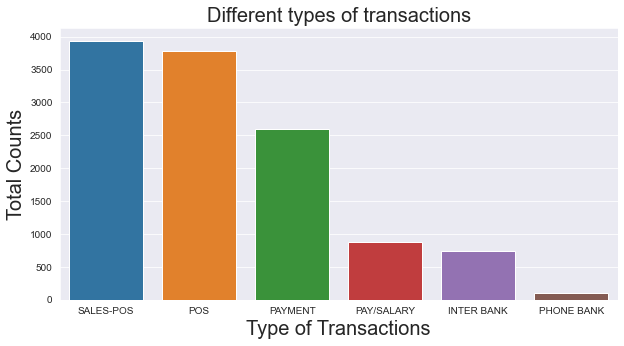

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.barplot(txn_desc.index, txn_desc.values)
plt.title('Different types of transactions', fontsize = 20)
plt.xlabel('Type of Transactions', fontsize = 20)
plt.ylabel('Total Counts', fontsize = 20)
plt.show()

**We have greater number of transactions for SALES-POS which is 3934, then POS transactions which is 3783 and then payment which is 2600**

### Q2: What is the average transaction amount?

In [13]:
df['amount'].mean()

187.93358797641767

**The average transaction amount is $188**

### Q3: How many transactions do customer make on each month on average?

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   account          12043 non-null  object        
 1   currency         12043 non-null  object        
 2   long_lat         12043 non-null  object        
 3   txn_description  12043 non-null  object        
 4   first_name       12043 non-null  object        
 5   balance          12043 non-null  float64       
 6   date             12043 non-null  datetime64[ns]
 7   gender           12043 non-null  object        
 8   age              12043 non-null  int64         
 9   extraction       12043 non-null  object        
 10  amount           12043 non-null  float64       
 11  country          12043 non-null  object        
 12  customer_id      12043 non-null  object        
 13  movement         12043 non-null  object        
dtypes: datetime64[ns](1), float64(2), int6

As our date column is already in datetime format, therefore we are not doing its typecasting, we directly take months out from it

In [15]:
# Make an new column named month
df['month'] = df['date'].dt.strftime('%B')

In [16]:
df.sample(3)

,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,extraction,amount,country,customer_id,movement,month
6981,ACC-2897221629,AUD,150.90 -34.37,SALES-POS,Scott,4872.16,2018-09-23,M,23,2018-09-23T17:55:16.000+0000,21.45,Australia,CUS-511326734,debit,September
9219,ACC-1799207998,AUD,150.68 -33.79,PAY/SALARY,Susan,9159.27,2018-10-10,F,20,2018-10-10T17:00:00.000+0000,1395.49,Australia,CUS-164374203,credit,October
4822,ACC-2673069055,AUD,152.99 -27.49,PAY/SALARY,Richard,21158.28,2018-09-07,M,24,2018-09-07T15:00:00.000+0000,6024.49,Australia,CUS-51506836,credit,September


In [17]:
#Groupby using the month column and find average transactions in each month
avg_month = df.groupby('month')['amount'].mean().sort_values(ascending=False)

In [18]:
# make dataframe
aa_month = pd.DataFrame({'Month' : avg_month.index, 'Average Transaction' : avg_month.values})
aa_month

,Month,Average Transaction
0,October,196.427323
1,August,185.121867
2,September,182.045903


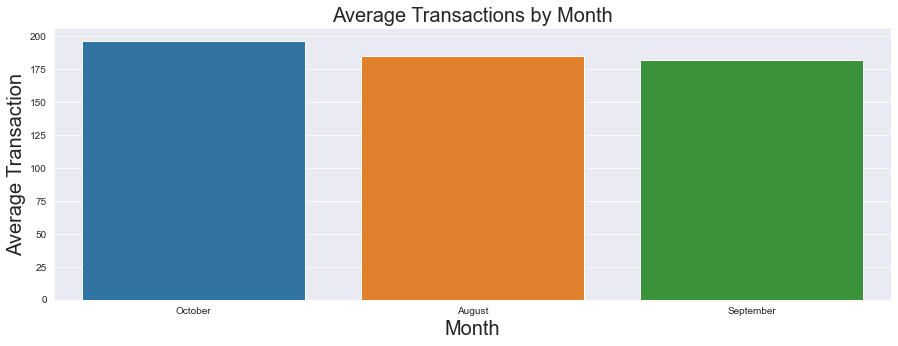

In [19]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
sns.barplot(x = 'Month', y = 'Average Transaction', data = aa_month)
plt.title('Average Transactions by Month', fontsize = 20)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Average Transaction', fontsize = 20)
plt.show()

### Q3: Segment the dataset into transaction date and time?

In [20]:
df.head(2)

,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,extraction,amount,country,customer_id,movement,month
0,ACC-1598451071,AUD,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,2018-08-01T01:01:15.000+0000,16.25,Australia,CUS-2487424745,debit,August
1,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,2018-08-01T01:13:45.000+0000,14.19,Australia,CUS-2487424745,debit,August


In [21]:
# Get the time in local version format
df['time'] = pd.to_datetime(df['extraction']).dt.strftime('%X')

In [22]:
#drop the extraction column
df.drop('extraction', axis = 1, inplace = True)

In [23]:
#check few rows random
df.head(3)

,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,amount,country,customer_id,movement,month,time
0,ACC-1598451071,AUD,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,16.25,Australia,CUS-2487424745,debit,August,01:01:15
1,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,14.19,Australia,CUS-2487424745,debit,August,01:13:45
2,ACC-1222300524,AUD,151.23 -33.94,POS,Michael,5.71,2018-08-01,M,38,6.42,Australia,CUS-2142601169,debit,August,01:26:15


In [24]:
# Groupby using transaction date and time

df_dt = df.groupby(['date', 'time'])

df_dt.first()

account currency       long_lat txn_description  \
date       time                                                               
2018-08-01 01:01:15  ACC-1598451071      AUD  153.41 -27.95             POS   
           01:13:45  ACC-1598451071      AUD  153.41 -27.95       SALES-POS   
           01:26:15  ACC-1222300524      AUD  151.23 -33.94             POS   
           01:38:45  ACC-1037050564      AUD  153.10 -27.66       SALES-POS   
           01:51:15  ACC-1598451071      AUD  153.41 -27.95       SALES-POS   
...                             ...      ...            ...             ...   
2018-10-31 23:09:06  ACC-3021093232      AUD  149.83 -29.47             POS   
           23:21:46  ACC-1608363396      AUD  151.22 -33.87       SALES-POS   
           23:34:25  ACC-3827517394      AUD  151.12 -33.89             POS   
           23:47:05  ACC-2920611728      AUD  144.96 -37.76       SALES-POS   
           23:59:44  ACC-1443681913      AUD  150.92 -33.77       SALES-POS   

                    first_name   balance gender  age  amount    country  \
date       time                                                           
2018-08-01 01:01:15      Diana     35.39      F   26   16.25  Australia   
           01:13:45      Diana     21.20      F   26   14.19  Australia   
           01:26:15    Michael      5.71      M   38    6.42  Australia   
           01:38:45     Rhonda   2117.22      F   40   40.90  Australia   
           01:51:15      Diana     17.95      F   26    3.25  Australia   
...                        ...       ...    ...  ...     ...        ...   
2018-10-31 23:09:06    Melissa  14054.14      F   30    9.79  Australia   
           23:21:46     Robert   9137.79      M   20   63.87  Australia   
           23:34:25      Craig  45394.57      M   28   43.96  Australia   
           23:47:05      Tyler  11350.67      M   69   30.77  Australia   
           23:59:44       Ryan   5517.91      M   31   22.36  Australia   

                        customer_id movement    month  
date       time                                        
2018-08-01 01:01:15  CUS-2487424745    debit   August  
           01:13:45  CUS-2487424745    debit   August  
           01:26:15  CUS-2142601169    debit   August  
           01:38:45  CUS-1614226872    debit   August  
           01:51:15  CUS-2487424745    debit   August  
...                             ...      ...      ...  
2018-10-31 23:09:06    CUS-55310383    debit  October  
           23:21:46  CUS-2688605418    debit  October  
           23:34:25  CUS-2663907001    debit  October  
           23:47:05  CUS-1388323263    debit  October  
           23:59:44  CUS-3129499595    debit  October  

[9442 rows x 13 columns]

### Q4. Visualize transaction volume and spending over the course of an average day or week. Consider effect of any outliers that distort your analysis

In [25]:
date_amount = df.groupby('date')['amount'].mean()
date_amount 

date
2018-08-01    218.014161
2018-08-02    143.331053
2018-08-03    242.653376
2018-08-04     53.356356
2018-08-05     44.265000
                 ...    
2018-10-27     50.155252
2018-10-28     59.007762
2018-10-29    377.932745
2018-10-30    247.891461
2018-10-31    155.795248
Name: amount, Length: 91, dtype: float64

In [26]:
# Convert into dataframe
df_amount = pd.DataFrame({'Transaction Date' : date_amount.index, 'Average Transaction Amount' : date_amount.values})
df_amount

,Transaction Date,Average Transaction Amount
0,2018-08-01,218.014161
1,2018-08-02,143.331053
2,2018-08-03,242.653376
3,2018-08-04,53.356356
4,2018-08-05,44.265000
...,...,...
86,2018-10-27,50.155252
87,2018-10-28,59.007762
88,2018-10-29,377.932745
89,2018-10-30,247.891461


In [27]:
# Interactive Line Plot

fig = px.line(df_amount, x = 'Transaction Date', y = 'Average Transaction Amount', 
title = 'Average Transaction per Day')

fig.show()

Highest average transaction is on August 20 which $497 and Second highest transaction is on October 15 which is $464.

### Q5. What insights you can draw from the location?

In [28]:
df[['long_lat', 'country']]

,long_lat,country
0,153.41 -27.95,Australia
1,153.41 -27.95,Australia
2,151.23 -33.94,Australia
3,153.10 -27.66,Australia
4,153.41 -27.95,Australia
...,...,...
12038,149.83 -29.47,Australia
12039,151.22 -33.87,Australia
12040,151.12 -33.89,Australia
12041,144.96 -37.76,Australia


In [29]:
df['country'].value_counts()

Australia    12043
Name: country, dtype: int64

In [30]:
df[['Longitude', 'Latitude']] = df['long_lat'].str.split(" ", expand=True)

In [31]:
df.head(3)

,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,amount,country,customer_id,movement,month,time,Longitude,Latitude
0,ACC-1598451071,AUD,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,16.25,Australia,CUS-2487424745,debit,August,01:01:15,153.41,-27.95
1,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,14.19,Australia,CUS-2487424745,debit,August,01:13:45,153.41,-27.95
2,ACC-1222300524,AUD,151.23 -33.94,POS,Michael,5.71,2018-08-01,M,38,6.42,Australia,CUS-2142601169,debit,August,01:26:15,151.23,-33.94


In [38]:
#save dataset
df.to_csv('ANZ Cleaned data.csv')

In [32]:
fig = px.density_mapbox(df, lat = 'Latitude', lon = 'Longitude', radius=1,
center=dict(lat = 0, lon = 180), zoom = 1.5, mapbox_style='stamen-terrain')

fig.show()

The majority of customer who made transactions are from Melbourne, Sydney, Brisbane, and Perth (western australia).

# Upload graphs on plotly chart studio

```
pip install chart_studio
```

In [33]:
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls

In [34]:
#Define your username and api_key using the following lines of code.

username = 'usmanes'
api_key = 'Rz4xHbiMpJRaZth9gGKR'

#login to chart studio
chart_studio.tools.set_credentials_file(username = username, api_key= api_key)

In [35]:
#Take the graph that you want to make available online and set it equal to a variable

map_loc = px.density_mapbox(df, lat = 'Latitude', lon = 'Longitude', radius=1,
center=dict(lat = 0, lon = 180), zoom = 1.5, mapbox_style='stamen-terrain')

py.plot(map_loc, filename = 'Location Insights', auto_open = False)

'https://plotly.com/~usmanes/3/'